<a href="https://colab.research.google.com/github/shakilB/Projects/blob/main/Sentment_Classification_Using_LSTM_and_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [ ]:
data = pd.read_csv('/content/finaldataset.csv')

In [ ]:
data.shape

(13802, 6)

In [ ]:
data.head()

,data,title_x,title_y,title,value,tag
0,লিখার সময় পারলে সত্য লিখার অভ্যাস শিখুন।,-1,-1,2,-1,কিছুটা নেতিবাচক
1,এটা কেন হচ্ছে? সংশ্লিষ্ট সকলের ডিপ্রেশনের ফলে?...,-1,-1,-1,-1,কিছুটা নেতিবাচক
2,আমাদের দেশের স্বাভাবিক অর্থনৈতিক গতিপ্রবাহকে ব...,-1,-2,-2,-5,নিশ্চিত নেতিবাচক
3,চুরি নয় লুটপাট।,-2,-2,-2,-6,নিশ্চিত নেতিবাচক
4,ইসলামী ব্যাংকের বর্তমান অবস্থা দেখে মনে হয় শাস...,0,-1,0,0,নিরপেক্ষ


In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
title_x,13802.0,-0.285176,1.405207,-2.0,-2.0,0.0,1.0,2.0
title_y,13802.0,-0.259962,1.253276,-2.0,-1.0,0.0,1.0,2.0
title,13802.0,-0.343356,1.337693,-2.0,-1.0,-1.0,1.0,2.0
value,13802.0,-0.574554,2.686582,-6.0,-2.0,-1.0,1.0,6.0


In [ ]:
data.drop(['title_x','title_y','title','value'],axis=1,inplace=True)

In [ ]:
data.head()

,data,tag
0,লিখার সময় পারলে সত্য লিখার অভ্যাস শিখুন।,কিছুটা নেতিবাচক
1,এটা কেন হচ্ছে? সংশ্লিষ্ট সকলের ডিপ্রেশনের ফলে?...,কিছুটা নেতিবাচক
2,আমাদের দেশের স্বাভাবিক অর্থনৈতিক গতিপ্রবাহকে ব...,নিশ্চিত নেতিবাচক
3,চুরি নয় লুটপাট।,নিশ্চিত নেতিবাচক
4,ইসলামী ব্যাংকের বর্তমান অবস্থা দেখে মনে হয় শাস...,নিরপেক্ষ


In [ ]:
data.tail()

,data,tag
13797,ভালভাবে নির্বাচন দেন।,নিরপেক্ষ
13798,বঙ্গবন্ধুর খুনীদের পারবেন না? এই মূহূর্তে অবশ্...,নিরপেক্ষ
13799,আইনকে তার নিজস্ব গতিতে চলতে দেওয়া হোক।,নিরপেক্ষ
13800,দেশের প্রশাসন নিরপেক্ষ না। এমতাবস্থায় তারেক জি...,নিরপেক্ষ
13801,সেই ২১ আগস্টের কারিগর বিএনপির রা আজ আমাদের গনত...,নিরপেক্ষ


In [ ]:
data.isnull().sum()

data    0
tag     0
dtype: int64

In [ ]:
data.isnull()

,data,tag
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
13797,False,False
13798,False,False
13799,False,False
13800,False,False


In [ ]:
data.describe()

,data,tag
count,13802,13802
unique,13542,5
top,বোঝা যাচ্ছে সৃষ্টিকর্তা কিছু মানুষকে লাজ লজ্জা...,নিশ্চিত নেতিবাচক
freq,2,3928


In [ ]:
data.tag.unique()

array(['কিছুটা নেতিবাচক', 'নিশ্চিত নেতিবাচক', 'নিরপেক্ষ',
       'কিছুটা ইতিবাচক', 'নিশ্চিত ইতিবাচক'], dtype=object)

In [ ]:
data.loc[(data.tag == 'কিছুটা নেতিবাচক'),'label']=1
data.loc[(data.tag == 'নিশ্চিত নেতিবাচক'),'label']=1
data.loc[(data.tag == 'নিরপেক্ষ'),'label']=0
data.loc[(data.tag == 'কিছুটা ইতিবাচক'),'label']=0
data.loc[(data.tag == 'নিশ্চিত ইতিবাচক'),'label']=0



In [ ]:
data['label'] = data['label'].apply(np.int64)

In [ ]:
data.head()

,data,tag,label
0,লিখার সময় পারলে সত্য লিখার অভ্যাস শিখুন।,কিছুটা নেতিবাচক,1
1,এটা কেন হচ্ছে? সংশ্লিষ্ট সকলের ডিপ্রেশনের ফলে?...,কিছুটা নেতিবাচক,1
2,আমাদের দেশের স্বাভাবিক অর্থনৈতিক গতিপ্রবাহকে ব...,নিশ্চিত নেতিবাচক,1
3,চুরি নয় লুটপাট।,নিশ্চিত নেতিবাচক,1
4,ইসলামী ব্যাংকের বর্তমান অবস্থা দেখে মনে হয় শাস...,নিরপেক্ষ,0


In [ ]:
data.label

0        1
1        1
2        1
3        1
4        0
        ..
13797    0
13798    0
13799    0
13800    0
13801    0
Name: label, Length: 13802, dtype: int64

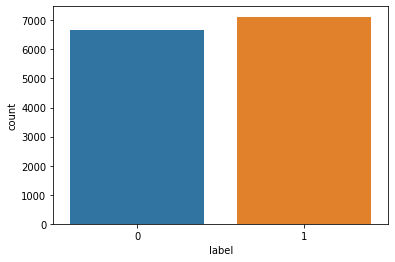

In [ ]:
tmp =  data['label'].value_counts().sort_index()
import seaborn as sb
sb.countplot(x='label' , data = data , order = tmp.index)

In [ ]:
from sklearn.utils import class_weight
class_weights = list(class_weight.compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(data['label']),
                                        y = data['label']                                                    
                                    ))
weights = dict(zip(np.unique(data['label']), class_weights))
weights

{0: 1.0337028160575195, 1: 0.9684254841425765}

In [ ]:
new_df = data.loc[: , ['data' , 'label']] 


In [ ]:
new_df.shape

(13802, 2)

In [ ]:
new_df.sample(5)

,data,label
4293,পলান সরকারের জন্ম নাম ছিল হারেজ উদ্দিন সরকার। ...,0
10814,উইকেট কি আনপ্লেয়বল দেখেছেন? কোহলিকে ফেবারিট বা...,0
8585,কেন্দ্রীয় ব্যাংককে সব ধরনের পদক্ষেপ নিতে হবে’ ...,1
10749,কী আদর্শ ক্রিকেটার জেন্টেলম্যান ছিলেন রমন লাম্...,0
752,"বাংলাদেশ ব্যাংকের তদন্ত রিপোর্টে কী আছে,জানতে...",0


In [ ]:
train_data = new_df.iloc[0:9661][:]



In [ ]:
train_data.shape

(9661, 2)

In [ ]:
test_data = new_df.iloc[9661:][:]

In [ ]:
test_data.shape

(4141, 2)

In [ ]:
list_content = train_data['data'].tolist()
list_label = train_data['label'].astype(int).tolist()
test_content = test_data['data'].tolist()
test_label = test_data['label'].tolist()

In [ ]:
import re
def rex(token):
    return re.sub("([A-Za-z0-9_:.]+|[\n]+|[\xa0]+|শেয়ার করুন)","",token)
list_content =[rex(token) for token in list_content]
test_content = [rex(token) for token in test_content]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
training_sentences , testing_sentences, training_labels, testing_labels = train_test_split(list_content, list_label, test_size=0.20, random_state=42)

In [ ]:
len(training_sentences)

7728

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
puncList = ["।", "”", "“", "’"]
x= "".join(puncList)
filterString = x + '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n০১২৩৪৫৬৭৮৯'
tokenizer = Tokenizer(oov_token='<OOV>',filters=filterString)
tokenizer.fit_on_texts(list_content)

In [ ]:
list(tokenizer.word_index.items())[:20]

[('<OOV>', 1),
 ('না', 2),
 ('করে', 3),
 ('আর', 4),
 ('কি', 5),
 ('এই', 6),
 ('হবে', 7),
 ('হয়', 8),
 ('টাকা', 9),
 ('করা', 10),
 ('জন্য', 11),
 ('থেকে', 12),
 ('ও', 13),
 ('যে', 14),
 ('কোন', 15),
 ('তো', 16),
 ('করতে', 17),
 ('আমাদের', 18),
 ('এর', 19),
 ('আছে', 20)]

In [ ]:
vocab_size = len(tokenizer.word_index)+1

In [ ]:
vocab_size

27200

In [ ]:
list_content[10]

'এরা যেখানেই যাবে সেখানেই চুরি হবে।'

In [ ]:
max_length = 1000
trunc_type = 'post'
padding_type = 'post'
training_sequences = tokenizer.texts_to_sequences(list_content)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences= tokenizer.texts_to_sequences(test_content)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length , padding= padding_type , truncating= trunc_type)

In [ ]:
tokenizer.texts_to_sequences(['মানব সেবাই সবচেয়ে বড় ধর্ম'])

[[2031, 1, 209, 69, 1284]]

In [ ]:
print(testing_padded[5])

[  63 2017  223 1079 1404   77 2649   53 1740  312 2692    4   24    7
    2    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [ ]:
training_padded = np.array(training_padded)
training_labels = np.array(list_label)
testing_padded = np.array(testing_padded)
testing_labels = np.array(test_label)

In [ ]:
embedding_dim = 50

In [ ]:
training_padded

array([[ 5952,    94,   304, ...,     0,     0,     0],
       [   42,    34,    39, ...,     0,     0,     0],
       [   18,    21,   509, ...,     0,     0,     0],
       ...,
       [ 1027,    18,  1967, ...,     0,     0,     0],
       [   67,    78,  7050, ...,     0,     0,     0],
       [27193,   154,  1545, ...,     0,     0,     0]], dtype=int32)

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding , Bidirectional,LSTM ,Dense , Dropout
import keras
from keras import backend as K

In [ ]:
model = Sequential(
    [
     Embedding(input_dim=vocab_size,output_dim= embedding_dim , input_length=max_length),
     Bidirectional(LSTM(64,return_sequences=True)),
     Bidirectional(LSTM(32)),
     Dense(1, activation='sigmoid')
    ]
)

In [ ]:
model_regularization = Sequential(
    [
     Embedding(input_dim=vocab_size,output_dim= embedding_dim , input_length=max_length),
     Bidirectional(LSTM(64,return_sequences=True)),
     Dropout(rate=.4),
     Bidirectional(LSTM(32)),
     Dropout(rate=.4),
     Dense(1, activation='sigmoid')
    ]
)

In [ ]:
from keras.models import Sequential
from keras import layers


In [ ]:
embedding_dim = 100

model_cnn = Sequential()
model_cnn.add(layers.Embedding(input_dim=vocab_size,output_dim= embedding_dim , input_length=max_length))
model_cnn.add(layers.Conv1D(128, 5, activation='relu'))
model_cnn.add(layers.GlobalMaxPooling1D())
model_cnn.add(layers.Dense(10, activation='relu'))
model_cnn.add(layers.Dense(1, activation='sigmoid'))

**LSTM MODEL**

In [ ]:
model.compile(loss='binary_crossentropy' , optimizer= 'adam' , metrics= ['accuracy'])
#model with regularixation
model_regularization.compile(loss='binary_crossentropy' , optimizer= 'adam' , metrics= ['accuracy'])



**CNN MODEL**

In [ ]:
model_cnn.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 1000, 100)         2720000   
                                                                 
 bidirectional_4 (Bidirectio  (None, 1000, 128)        84480     
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,845,761
Trainable params: 2,845,761
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_regularization.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 1000, 100)         2720000   
                                                                 
 bidirectional_6 (Bidirectio  (None, 1000, 128)        84480     
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 1000, 128)         0         
                                                                 
 bidirectional_7 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                

In [ ]:
model_cnn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 1000, 100)         2720000   
                                                                 
 conv1d_1 (Conv1D)           (None, 996, 128)          64128     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,785,429
Trainable params: 2,785,429
Non-trainable params: 0
____________________________________________

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs")

In [ ]:
num_epochs = 10
history = model.fit(training_padded , training_labels , epochs= num_epochs,validation_data=(testing_padded , testing_labels), callbacks=[tensorboard_callback], verbose =2, class_weight= 0 )

Epoch 1/10
302/302 - 170s - loss: 0.6587 - accuracy: 0.6112 - val_loss: 0.7061 - val_accuracy: 0.5235 - 170s/epoch - 562ms/step
Epoch 2/10
302/302 - 168s - loss: 0.4561 - accuracy: 0.7939 - val_loss: 0.7681 - val_accuracy: 0.5895 - 168s/epoch - 556ms/step
Epoch 3/10
302/302 - 154s - loss: 0.2121 - accuracy: 0.9233 - val_loss: 1.0620 - val_accuracy: 0.5743 - 154s/epoch - 510ms/step
Epoch 4/10
302/302 - 168s - loss: 0.1141 - accuracy: 0.9624 - val_loss: 1.3149 - val_accuracy: 0.5709 - 168s/epoch - 556ms/step
Epoch 5/10
302/302 - 168s - loss: 0.0652 - accuracy: 0.9739 - val_loss: 1.6487 - val_accuracy: 0.5820 - 168s/epoch - 557ms/step
Epoch 6/10
302/302 - 168s - loss: 0.0353 - accuracy: 0.9815 - val_loss: 1.8188 - val_accuracy: 0.5796 - 168s/epoch - 557ms/step
Epoch 7/10
302/302 - 153s - loss: 0.0380 - accuracy: 0.9795 - val_loss: 2.0461 - val_accuracy: 0.5598 - 153s/epoch - 508ms/step
Epoch 8/10
302/302 - 168s - loss: 0.0303 - accuracy: 0.9829 - val_loss: 2.2053 - val_accuracy: 0.5726 - 

In [ ]:
num_epoch = 10 
history_cnn = model_cnn.fit(training_padded , training_labels , epochs= num_epochs,validation_data=(testing_padded , testing_labels), callbacks=[tensorboard_callback],verbose=2,class_weight=0)

Epoch 1/10
302/302 - 34s - loss: 0.6617 - accuracy: 0.6028 - val_loss: 0.6799 - val_accuracy: 0.5774 - 34s/epoch - 112ms/step
Epoch 2/10
302/302 - 7s - loss: 0.4552 - accuracy: 0.7983 - val_loss: 0.7444 - val_accuracy: 0.5861 - 7s/epoch - 24ms/step
Epoch 3/10
302/302 - 7s - loss: 0.1795 - accuracy: 0.9418 - val_loss: 0.9116 - val_accuracy: 0.5885 - 7s/epoch - 24ms/step
Epoch 4/10
302/302 - 7s - loss: 0.0912 - accuracy: 0.9758 - val_loss: 1.0024 - val_accuracy: 0.5793 - 7s/epoch - 24ms/step
Epoch 5/10
302/302 - 7s - loss: 0.0677 - accuracy: 0.9817 - val_loss: 0.9968 - val_accuracy: 0.5991 - 7s/epoch - 24ms/step
Epoch 6/10
302/302 - 7s - loss: 0.0610 - accuracy: 0.9825 - val_loss: 1.1074 - val_accuracy: 0.5813 - 7s/epoch - 23ms/step
Epoch 7/10
302/302 - 7s - loss: 0.0526 - accuracy: 0.9825 - val_loss: 1.0833 - val_accuracy: 0.5902 - 7s/epoch - 24ms/step
Epoch 8/10
302/302 - 7s - loss: 0.0487 - accuracy: 0.9843 - val_loss: 1.0926 - val_accuracy: 0.5965 - 7s/epoch - 23ms/step
Epoch 9/10
30

In [ ]:
num_epoch =10 
history_dropout = model_regularization.fit(training_padded , training_labels , epochs= num_epochs,validation_data=(testing_padded , testing_labels), callbacks=[tensorboard_callback], verbose =2,class_weight=0 )


Epoch 1/10
302/302 - 164s - loss: 0.6633 - accuracy: 0.6072 - val_loss: 0.6878 - val_accuracy: 0.5462 - 164s/epoch - 544ms/step
Epoch 2/10
302/302 - 154s - loss: 0.4741 - accuracy: 0.7889 - val_loss: 0.8159 - val_accuracy: 0.5537 - 154s/epoch - 511ms/step
Epoch 3/10
302/302 - 168s - loss: 0.2379 - accuracy: 0.9145 - val_loss: 1.0233 - val_accuracy: 0.5735 - 168s/epoch - 557ms/step
Epoch 4/10
302/302 - 168s - loss: 0.1315 - accuracy: 0.9579 - val_loss: 1.2652 - val_accuracy: 0.5615 - 168s/epoch - 557ms/step
Epoch 5/10
302/302 - 154s - loss: 0.0859 - accuracy: 0.9725 - val_loss: 1.5325 - val_accuracy: 0.5747 - 154s/epoch - 509ms/step
Epoch 6/10
302/302 - 153s - loss: 0.0547 - accuracy: 0.9800 - val_loss: 1.7217 - val_accuracy: 0.5651 - 153s/epoch - 505ms/step
Epoch 7/10
302/302 - 168s - loss: 0.0379 - accuracy: 0.9828 - val_loss: 2.1309 - val_accuracy: 0.5757 - 168s/epoch - 556ms/step
Epoch 8/10
302/302 - 168s - loss: 0.0312 - accuracy: 0.9824 - val_loss: 2.2264 - val_accuracy: 0.5627 - 

In [ ]:
num_epoch = 10 
history_cnn = model_cnn.fit(training_padded , training_labels , epochs= num_epochs,validation_data=(testing_padded , testing_labels), callbacks=[tensorboard_callback],verbose=2,class_weight=0)

Epoch 1/10
302/302 - 7s - loss: 0.0396 - accuracy: 0.9841 - val_loss: 1.2783 - val_accuracy: 0.5694 - 7s/epoch - 23ms/step
Epoch 2/10
302/302 - 7s - loss: 0.0358 - accuracy: 0.9843 - val_loss: 1.1982 - val_accuracy: 0.5846 - 7s/epoch - 24ms/step
Epoch 3/10
302/302 - 7s - loss: 0.0337 - accuracy: 0.9834 - val_loss: 1.1774 - val_accuracy: 0.5897 - 7s/epoch - 23ms/step
Epoch 4/10
302/302 - 7s - loss: 0.0318 - accuracy: 0.9834 - val_loss: 1.1664 - val_accuracy: 0.5933 - 7s/epoch - 24ms/step
Epoch 5/10
302/302 - 7s - loss: 0.0306 - accuracy: 0.9831 - val_loss: 1.1125 - val_accuracy: 0.5938 - 7s/epoch - 23ms/step
Epoch 6/10
302/302 - 7s - loss: 0.0287 - accuracy: 0.9839 - val_loss: 1.2919 - val_accuracy: 0.6035 - 7s/epoch - 23ms/step
Epoch 7/10
302/302 - 7s - loss: 0.0283 - accuracy: 0.9845 - val_loss: 1.4848 - val_accuracy: 0.5607 - 7s/epoch - 23ms/step
Epoch 8/10
302/302 - 7s - loss: 0.0274 - accuracy: 0.9829 - val_loss: 1.2967 - val_accuracy: 0.5827 - 7s/epoch - 24ms/step
Epoch 9/10
302/3

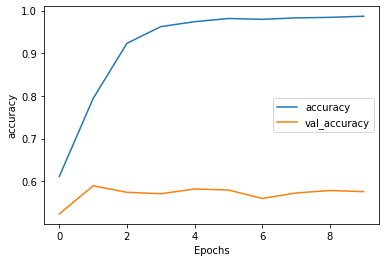

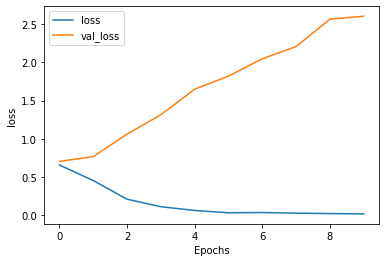

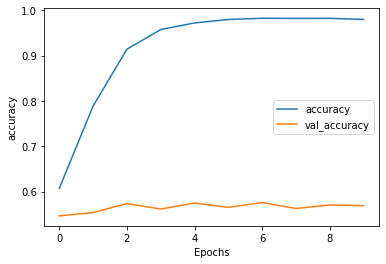

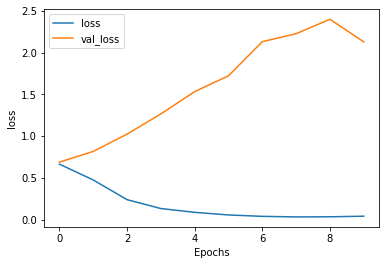

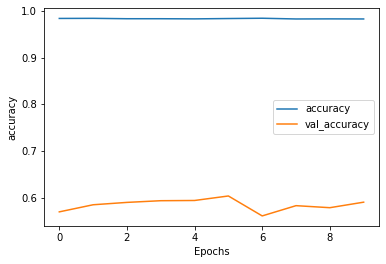

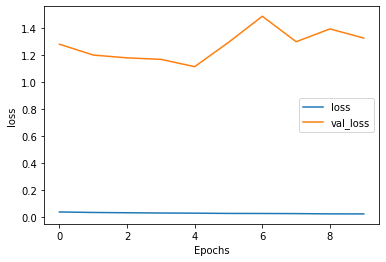

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

#plot for normal LSTM
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

#plot for LSTM with dropout
plot_graphs(history_dropout, "accuracy")
plot_graphs(history_dropout, "loss")

#plot for CNN
plot_graphs(history_cnn, "accuracy")
plot_graphs(history_cnn, "loss")


In [ ]:
def focal_loss(y_true, y_pred):

  gamma= 2.0
  alpha = 0.25
  pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
  pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
  return -K.sum(alpha * K.pow(1. - pt_1, gamma) * K.log(pt_1))-K.sum((1-alpha) * K.pow( pt_0, gamma) * K.log(1. - pt_0))

In [ ]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

model.compile(loss='binary_crossentropy' , optimizer= 'adam' , metrics= METRICS)
model_regularization.compile(loss='binary_crossentropy' , optimizer= 'adam' , metrics= METRICS)
model_cnn.compile(loss='binary_crossentropy' , optimizer= 'adam' , metrics= METRICS)

In [ ]:
num_epochs = 10
weighted_history = model.fit(training_padded , training_labels , epochs= num_epochs,validation_data=(testing_padded , testing_labels), callbacks=[tensorboard_callback],verbose=2,class_weight=0)

Epoch 1/10
302/302 - 167s - loss: 0.0340 - tp: 5361.0000 - fp: 99.0000 - tn: 4132.0000 - fn: 69.0000 - accuracy: 0.9826 - precision: 0.9819 - recall: 0.9873 - auc: 0.9985 - val_loss: 2.4149 - val_tp: 1058.0000 - val_fp: 1195.0000 - val_tn: 1250.0000 - val_fn: 638.0000 - val_accuracy: 0.5574 - val_precision: 0.4696 - val_recall: 0.6238 - val_auc: 0.5858 - 167s/epoch - 555ms/step
Epoch 2/10
302/302 - 170s - loss: 0.0296 - tp: 5329.0000 - fp: 58.0000 - tn: 4173.0000 - fn: 101.0000 - accuracy: 0.9835 - precision: 0.9892 - recall: 0.9814 - auc: 0.9990 - val_loss: 2.0902 - val_tp: 904.0000 - val_fp: 983.0000 - val_tn: 1462.0000 - val_fn: 792.0000 - val_accuracy: 0.5714 - val_precision: 0.4791 - val_recall: 0.5330 - val_auc: 0.5879 - 170s/epoch - 562ms/step
Epoch 3/10
302/302 - 155s - loss: 0.0286 - tp: 5366.0000 - fp: 98.0000 - tn: 4133.0000 - fn: 64.0000 - accuracy: 0.9832 - precision: 0.9821 - recall: 0.9882 - auc: 0.9987 - val_loss: 2.1861 - val_tp: 961.0000 - val_fp: 1062.0000 - val_tn: 

In [ ]:
num_epochs = 10
weighted_history_dropout = model_regularization.fit(training_padded , training_labels , epochs= num_epochs,validation_data=(testing_padded , testing_labels), callbacks=[tensorboard_callback],verbose=2,class_weight=0)

Epoch 1/10
302/302 - 181s - loss: 0.0351 - tp: 6227.0000 - fp: 1042.0000 - tn: 5634.0000 - fn: 899.0000 - accuracy: 0.8594 - precision: 0.8567 - recall: 0.8738 - auc: 0.9068 - val_loss: 2.4450 - val_tp: 1072.0000 - val_fp: 1223.0000 - val_tn: 1222.0000 - val_fn: 624.0000 - val_accuracy: 0.5540 - val_precision: 0.4671 - val_recall: 0.6321 - val_auc: 0.5848 - 181s/epoch - 599ms/step
Epoch 2/10
302/302 - 170s - loss: 0.0275 - tp: 5348.0000 - fp: 59.0000 - tn: 4172.0000 - fn: 82.0000 - accuracy: 0.9854 - precision: 0.9891 - recall: 0.9849 - auc: 0.9992 - val_loss: 2.3891 - val_tp: 984.0000 - val_fp: 1060.0000 - val_tn: 1385.0000 - val_fn: 712.0000 - val_accuracy: 0.5721 - val_precision: 0.4814 - val_recall: 0.5802 - val_auc: 0.5863 - 170s/epoch - 562ms/step
Epoch 3/10
302/302 - 170s - loss: 0.0278 - tp: 5342.0000 - fp: 68.0000 - tn: 4163.0000 - fn: 88.0000 - accuracy: 0.9839 - precision: 0.9874 - recall: 0.9838 - auc: 0.9989 - val_loss: 2.0828 - val_tp: 1002.0000 - val_fp: 1122.0000 - val_

In [ ]:
num_epochs = 10
weighted_history_cnn = model_regularization.fit(training_padded , training_labels , epochs= num_epochs,validation_data=(testing_padded , testing_labels), callbacks=[tensorboard_callback],verbose=2,class_weight=0)

Epoch 1/10
302/302 - 170s - loss: 0.0286 - tp: 5367.0000 - fp: 89.0000 - tn: 4142.0000 - fn: 63.0000 - accuracy: 0.9843 - precision: 0.9837 - recall: 0.9884 - auc: 0.9991 - val_loss: 2.2844 - val_tp: 957.0000 - val_fp: 1069.0000 - val_tn: 1376.0000 - val_fn: 739.0000 - val_accuracy: 0.5634 - val_precision: 0.4724 - val_recall: 0.5643 - val_auc: 0.5850 - 170s/epoch - 563ms/step
Epoch 2/10
302/302 - 169s - loss: 0.0223 - tp: 5335.0000 - fp: 40.0000 - tn: 4191.0000 - fn: 95.0000 - accuracy: 0.9860 - precision: 0.9926 - recall: 0.9825 - auc: 0.9996 - val_loss: 2.5985 - val_tp: 1065.0000 - val_fp: 1195.0000 - val_tn: 1250.0000 - val_fn: 631.0000 - val_accuracy: 0.5590 - val_precision: 0.4712 - val_recall: 0.6279 - val_auc: 0.5845 - 169s/epoch - 559ms/step
Epoch 3/10
302/302 - 169s - loss: 0.0184 - tp: 5377.0000 - fp: 66.0000 - tn: 4165.0000 - fn: 53.0000 - accuracy: 0.9877 - precision: 0.9879 - recall: 0.9902 - auc: 0.9997 - val_loss: 2.8323 - val_tp: 993.0000 - val_fp: 1085.0000 - val_tn: 

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [ ]:
def plot_metrics(history):
  metrics = ['loss', 'auc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

In [ ]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print(' (True Negatives): ', cm[0][0])
  print(' (False Positives): ', cm[0][1])
  print('(False Negatives): ', cm[1][0])
  print('(True Positives): ', cm[1][1])
  print('Total : ', np.sum(cm[1]))

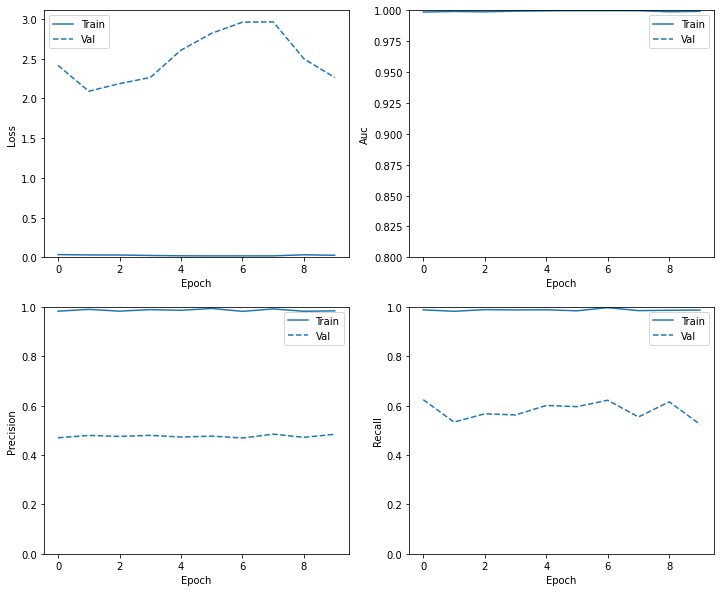

In [ ]:
#plot for LSTM
plot_metrics(weighted_history)

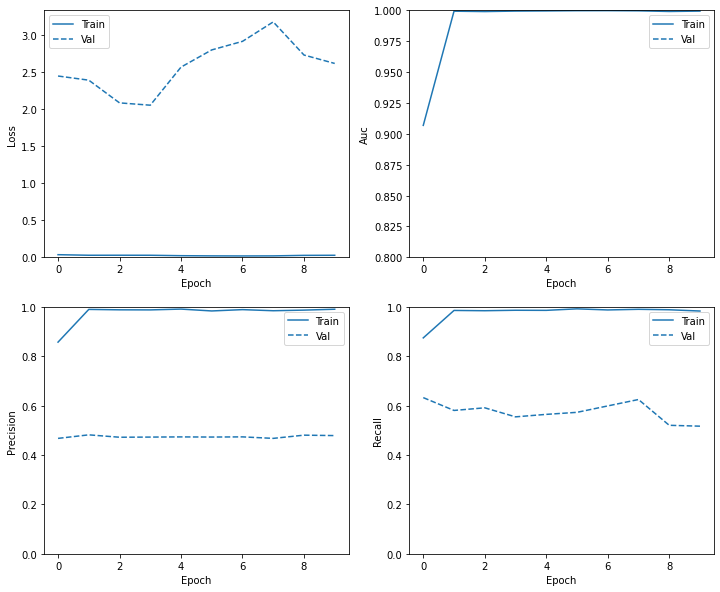

In [ ]:
#plot for LSTM (with Dropout)
plot_metrics(weighted_history_dropout)

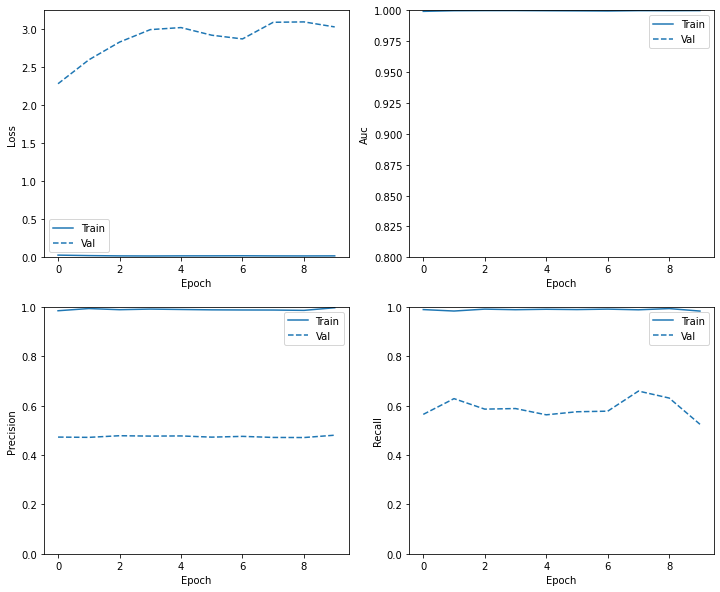

In [ ]:
plot_metrics(weighted_history_cnn)

loss :  2.2630462646484375
tp :  889.0
fp :  949.0
tn :  1496.0
fn :  807.0
accuracy :  0.5759478211402893
precision :  0.4836779236793518
recall :  0.5241745114326477
auc :  0.5901156663894653

Legitimate Transactions Detected (True Negatives):  1496
Legitimate Transactions Incorrectly Detected (False Positives):  949
Fraudulent Transactions Missed (False Negatives):  807
Fraudulent Transactions Detected (True Positives):  889
Total Fraudulent Transactions:  1696


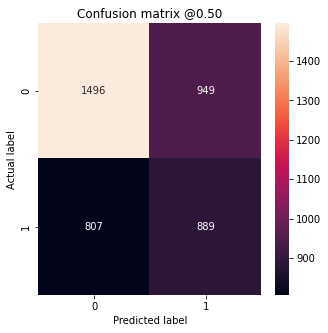

In [ ]:
# for LSTM
test_predictions_baseline = model.predict(testing_padded, batch_size=1000)

baseline_results = model.evaluate(testing_padded , testing_labels,
                                  batch_size=1000, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(testing_labels, test_predictions_baseline)

loss :  3.0319581031799316
tp :  889.0
fp :  963.0
tn :  1482.0
fn :  807.0
accuracy :  0.5725669860839844
precision :  0.480021595954895
recall :  0.5241745114326477
auc :  0.5802542567253113

Legitimate Transactions Detected (True Negatives):  1482
Legitimate Transactions Incorrectly Detected (False Positives):  963
Fraudulent Transactions Missed (False Negatives):  807
Fraudulent Transactions Detected (True Positives):  889
Total Fraudulent Transactions:  1696


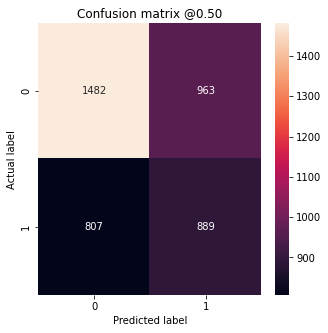

In [ ]:
# for LSTM(dropout)
test_predictions_baseline = model_regularization.predict(testing_padded, batch_size=1000)

baseline_results = model_regularization.evaluate(testing_padded , testing_labels,
                                  batch_size=1000, verbose=0)
for name, value in zip(model_regularization.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(testing_labels, test_predictions_baseline)

loss :  1.3236027956008911
tp :  806.0
fp :  807.0
tn :  1638.0
fn :  890.0
accuracy :  0.5901955962181091
precision :  0.4996900260448456
recall :  0.47523584961891174
auc :  0.6068615913391113

Legitimate Transactions Detected (True Negatives):  1638
Legitimate Transactions Incorrectly Detected (False Positives):  807
Fraudulent Transactions Missed (False Negatives):  890
Fraudulent Transactions Detected (True Positives):  806
Total Fraudulent Transactions:  1696


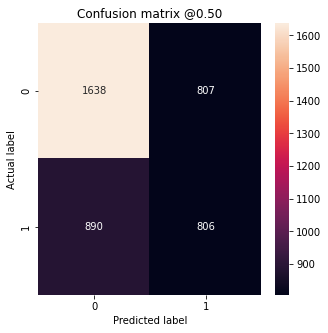

In [ ]:
# for CNN
test_predictions_baseline = model_cnn.predict(testing_padded, batch_size=1000)

baseline_results = model_cnn.evaluate(testing_padded , testing_labels,
                                  batch_size=1000, verbose=0)
for name, value in zip(model_cnn.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(testing_labels, test_predictions_baseline)